In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_blobs

2024-05-26 13:47:24.416475: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The shape of X is: (2, 2000)
The shape of y is: (1, 2000)


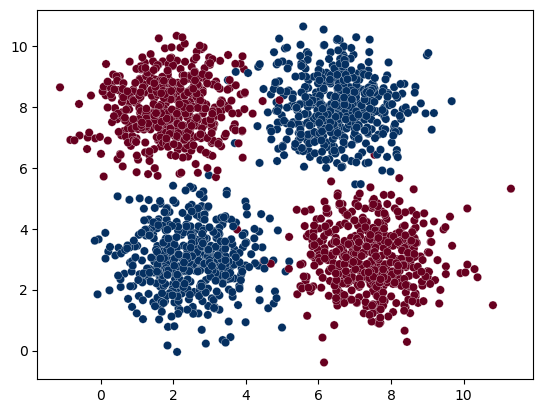

In [2]:
# Generate synthetic data for classification using sklearn's make_blobs
m = 2000
X, y = make_blobs(m, centers=([2.5, 3], [6.5, 8], [2, 8], [7.5, 3]), random_state=0)
y[(y == 0) | (y == 1)] = 1
y[(y == 2) | (y == 3)] = 0

# Transpose X to match the expected input shape for our model
X = X.T
# Reshape y to be a row vector
y = np.reshape(y, (1, -1))

# Plot the data points
plt.scatter(X[0, :], X[1, :], c=y[0, :], cmap='RdBu', edgecolors='white', linewidths=0.2);

# Print the shapes of X and y to verify their dimensions
print('The shape of X is: ' + str(X.shape))
print('The shape of y is: ' + str(y.shape))

In [3]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Initialize parameters for the neural network with two layers.
    
    Arguments:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- dictionary containing initialized parameters
    """
    W1 = tf.Variable(tf.random.normal(shape=(n_h, n_x)) * tf.sqrt(2/n_x))  # He initialization for weights
    b1 = tf.Variable(tf.zeros(shape=(n_h, 1)))  # Biases initialized to zero
    W2 = tf.Variable(tf.random.normal(shape=(n_y, n_h)) * tf.sqrt(2/n_y))  # He initialization for weights
    b2 = tf.Variable(tf.zeros(shape=(n_y, 1)))  # Biases initialized to zero

    params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return params

In [4]:
def sigmoid(z):
    """
    Compute the sigmoid activation function.
    
    Arguments:
    z -- input to the sigmoid function
    
    Returns:
    sigmoid(z) -- output of the sigmoid function
    """
    return 1 / (1 + tf.exp(-z))

In [5]:
def forward_propagation(X, params):
    """
    Perform forward propagation to predict the output.
    
    Arguments:
    X -- input data of shape (n_x, number of examples)
    params -- dictionary containing initialized parameters
    
    Returns:
    y_hat -- predicted output
    """
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    Z1 = W1 @ X + b1  # Linear transformation
    A1 = tf.nn.relu(Z1)  # ReLU activation function
    Z2 = W2 @ A1 + b2  # Linear transformation
    y_hat = sigmoid(Z2)  # Sigmoid activation function
    
    return y_hat 

In [6]:
def compute_cost(y, y_hat):
    """
    Compute the cost using binary cross-entropy.
    
    Arguments:
    y -- true "label" vector
    y_hat -- predicted output vector
    
    Returns:
    cost -- binary cross-entropy cost
    """
    logloss = tf.keras.losses.binary_crossentropy(y, y_hat)  # Binary cross-entropy loss function
    return tf.reduce_mean(logloss)

In [7]:
def gradient_descent(params, grads, learning_rate):
    """
    Update parameters using gradient descent.
    
    Arguments:
    params -- dictionary containing parameters
    grads -- dictionary containing gradients of the cost with respect to parameters
    learning_rate -- learning rate for gradient descent
    
    Returns:
    params -- updated parameters
    """
    for i in params.keys():
        params[i].assign_sub(learning_rate * grads[i])  # Update parameters using gradients

    return params

In [8]:
def nn_model(X, y, n_x, n_h, n_y, epochs, learning_rate):
    """
    Train the neural network model.
    
    Arguments:
    X -- input data
    y -- true "label" vector
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    epochs -- number of epochs to train the model
    learning_rate -- learning rate for gradient descent
    
    Returns:
    params -- trained parameters
    """
    params = initialize_parameters(n_x, n_h, n_y)  # Initialize parameters
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_hat = forward_propagation(X, params)  # Forward propagation
            cost = compute_cost(y, y_hat)  # Compute cost
            
        if epoch % 100 == 0:
            print(f'Epoch:{epoch}, Cost: {cost}')
        
        grads = tape.gradient(cost, params)  # Compute gradients
        params = gradient_descent(params, grads, learning_rate)  # Update parameters

    return params

In [9]:
# Set hyperparameters
LEARNING_RATE = 0.08
EPOCHS = 1000
n_x = X.shape[0]  # Number of input features
n_h = 8  # Number of units in hidden layer
n_y = y.shape[0]  # Number of output units

# Train the model and get the final parameters
params = nn_model(X, y, n_x, n_h, n_y, EPOCHS, LEARNING_RATE)

2024-05-26 13:47:28.341797: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch:0, Cost: 4.053420543670654
Epoch:100, Cost: 0.494193971157074
Epoch:200, Cost: 0.21899282932281494
Epoch:300, Cost: 0.18447479605674744
Epoch:400, Cost: 0.1671912521123886
Epoch:500, Cost: 0.15505395829677582
Epoch:600, Cost: 0.145969957113266
Epoch:700, Cost: 0.13901636004447937
Epoch:800, Cost: 0.1336434781551361
Epoch:900, Cost: 0.1294621080160141


In [10]:
def predict(X, params):
    """
    Make predictions using the trained model.
    
    Arguments:
    X -- input data
    params -- trained parameters
    
    Returns:
    predictions -- array of predictions
    """
    A2 = forward_propagation(X, params)  # Forward propagation
    predictions = A2 > 0.5  # Convert probabilities to binary predictions
    
    return predictions.numpy()

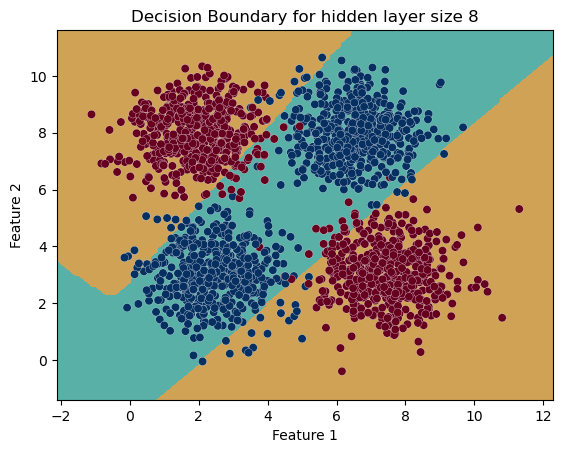

In [11]:
def plot_decision_boundary(X, y, params):
    """
    Plot the decision boundary of the trained model.
    
    Arguments:
    X -- input data
    y -- true "label" vector
    params -- trained parameters
    """
    min1, max1 = X[0, :].min() - 1, X[0, :].max() + 1
    min2, max2 = X[1, :].min() - 1, X[1, :].max() + 1

    # Generate a grid of points within the feature space
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((1, len(r1))), r2.reshape((1, len(r2)))
    grid = np.vstack((r1,r2))

    # Make predictions on the grid points
    predictions = predict(grid, params)
    zz = predictions.reshape(xx.shape)

    # Plot decision boundary and data points
    plt.contourf(xx, yy, zz, cmap='BrBG')
    plt.scatter(X[0, :], X[1, :], c=y[0, :], cmap='RdBu', edgecolors='white', linewidths=0.2)
    plt.title("Decision Boundary for hidden layer size " + str(n_h));
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary for the synthetic data
plot_decision_boundary(X, y, params)

## Additional dataset

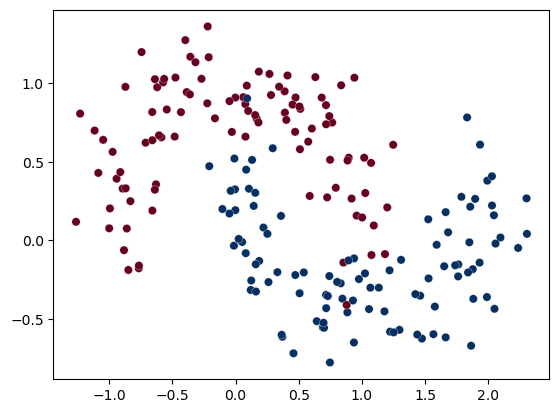

In [12]:
data = pd.read_csv('Arcs.csv')
X = data.iloc[:, :-1].T.to_numpy()
y = np.reshape(data.iloc[:, -1], (1, -1))
plt.scatter(X[0, :], X[1, :], c=y[0, :], cmap='RdBu', edgecolors='white', linewidths=0.2);

In [13]:
LEARNING_RATE = 0.5
EPOCHS = 1000

n_x = X.shape[0]  # Number of input features
n_h = 8  # Number of units in hidden layer
n_y = y.shape[0]  # Number of output units

params = nn_model(X, y, n_x, n_h, n_y, EPOCHS, LEARNING_RATE)

Epoch:0, Cost: 1.2190124988555908
Epoch:100, Cost: 0.24516266584396362
Epoch:200, Cost: 0.18983620405197144
Epoch:300, Cost: 0.14614100754261017
Epoch:400, Cost: 0.12344186753034592
Epoch:500, Cost: 0.10870549827814102
Epoch:600, Cost: 0.10034254193305969
Epoch:700, Cost: 0.09545047581195831
Epoch:800, Cost: 0.09228286147117615
Epoch:900, Cost: 0.09011119604110718


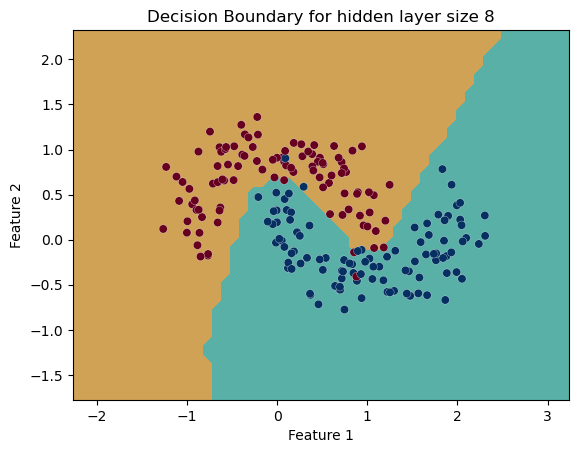

In [14]:
plot_decision_boundary(X, y, params);